# Section1 - Data Preparation 
- Download
- Load 
- Visualize
- Normalize


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("../datasets/Linear_X_Train.csv")
Y = pd.read_csv("../datasets/Linear_Y_Train.csv")

In [3]:
#convert to Numpy array
X = X.values
Y = Y.values

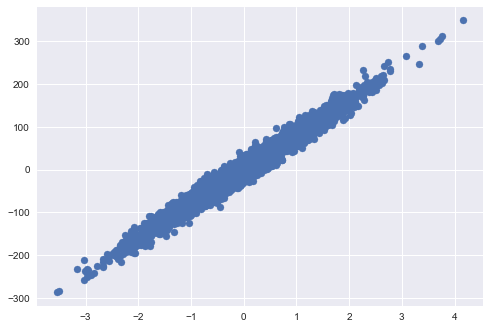

In [4]:
#Normalize
#When we normalize we do only to X values
mean = X.mean()
sd =X.std()
X = (X-mean)/sd
#visualize
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()

# Section 2 - Linear Regression

In [124]:
#this function takes a single value of X and a vector theta and computes prediction
def hypothesis(X,theta):
    y_hat = theta[0]+theta[1]*X;
    return y_hat

In [125]:
#This function Calculates gradient which is sumation of (prediction-actual) square
# gradient is also a vector with 2 values 
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        grad[0] += hypothesis(X[i],theta) - Y[i]
        grad[1] += (hypothesis(X[i],theta) - Y[i]) * X[i]
    return grad/m

In [136]:
#this is just to verify that our mean sq error is reducing
def error(X,Y,theta):
    m = X.shape[0]
    err = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        err += (y_hat-Y[i])**2
    return err/m    

In [142]:
#this will give us optimal theta ie where minima occurs
def gradient_descent(X,Y,learning_rate = 0.1,max_steps=100):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] -= learning_rate*gradient(X,Y,theta)[0]
        theta[1] -= learning_rate*gradient(X,Y,theta)[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [143]:
theta,error_list,theta_list = gradient_descent(X,Y)

In [144]:
print(theta)
print(len(theta_list))

[ 0.6838508  79.90361453]
100


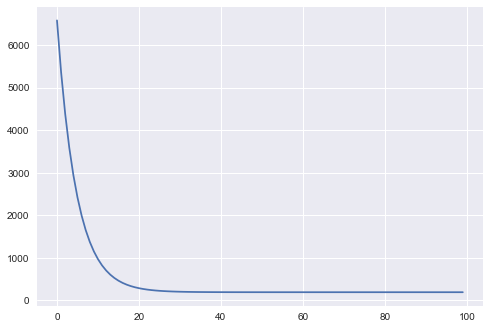

In [146]:
plt.plot(error_list)
plt.show()

# Section3 - Prediction and Best Line

In [147]:
#we can see that hypothsesis() function is only accepting a specific value
# of X but here we are giving a full column vector
# We can do this and this will return us a column vector of predictions
# All happenss due to broadcasting technique
y_ = hypothesis(X,theta)

In [148]:
type(y_)

numpy.ndarray

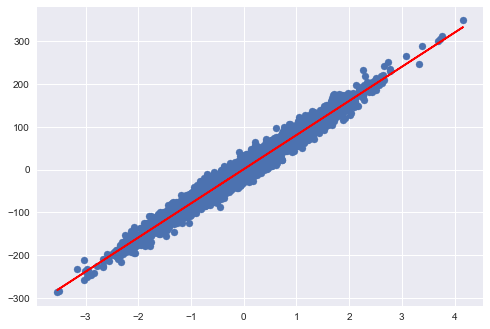

In [149]:
#compare our predicted values and actual values
plt.scatter(X,Y)
plt.plot(X,y_,color="red")
plt.show()

In [25]:
#predictions on test data
test_X = pd.read_csv("../datasets/Linear_X_Test.csv")
test_X.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [34]:
y_ = hypothesis(test_X,theta)
y_ = y_.values

In [27]:
y_.to_csv("y_pred",index=False,header="y")

# Section 4 - Computing Scores
score : R2(R-squared) or Coefficient of Determination

In [150]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [151]:
y_ = hypothesis(X,theta)

In [152]:
y_.shape

(3750, 1)

In [153]:
r2_score(Y,y_)

97.09612226971643

# Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

#### Loss Function 

In [154]:
# Loss visualization
# assume values of theta0 and theta1
T0 = np.arange(-50,50,1)
T1 = np.arange(40,130,1)
print(T0.shape,T1.shape)

(100,) (90,)


In [155]:
#Generate a surface from these points using meshgrid
T0,T1 = np.meshgrid(T0,T1)
print(T0.shape,T1.shape)
J = np.zeros(T0.shape)
print(J.shape)

(90, 100) (90, 100)
(90, 100)


In [172]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        #loss at a particular point i,j
        #calculate ycap for a particular theta ver all X
        y_ =  T1[i,j]*X + T0[i,j]
        # see formula for J from notes
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]
print(J.shape)

(90, 100)


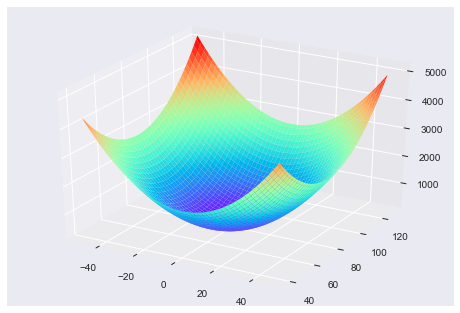

In [173]:
# Now we have calculated loss matrix so lets visualize it
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

#### Contour plot

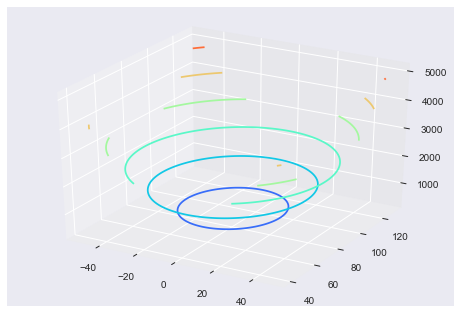

In [174]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap="rainbow")
plt.show()

## Theta Updates

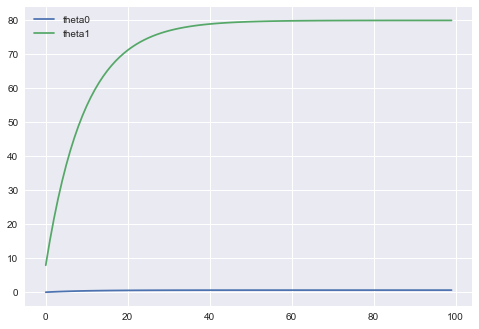

In [175]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="theta0")
plt.plot(theta_list[:,1],label="theta1")
plt.legend()
plt.show()

## Trajectory traced by theta updates in the Loss Function

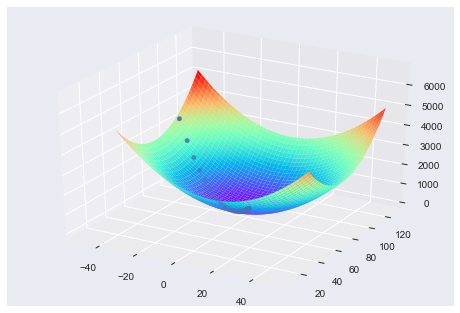

In [176]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

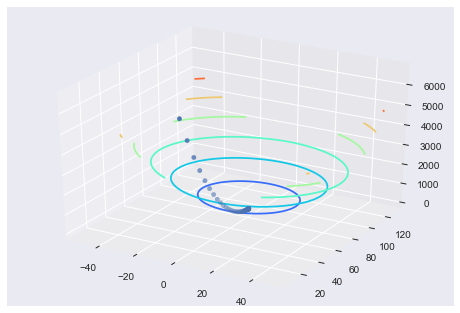

In [177]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

#### 2D contour


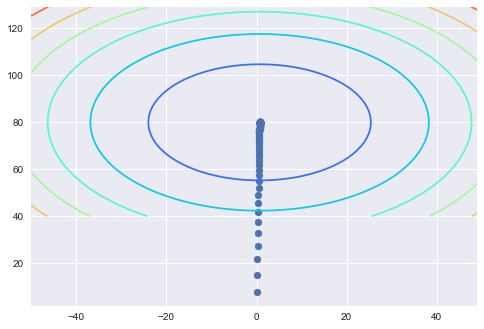

In [180]:
plt.contour(T0,T1,J,cmap="rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()
# as we approach to optimal theta size of jump decreases

# Save theta_list

In [182]:
np.save("theta",theta_list)